# Assignment 3

In [4]:
import sqlite3
import pandas as pd
import csv
%matplotlib inline
import pymongo
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure
from bson import json_util, ObjectId
import pandas as pd
from pandas import DataFrame
from pandas.io.json import json_normalize
import numpy as np
import requests
import json, os
import configparser
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
import random
import pprint
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
sqlite_file = 'project.db'
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

In [6]:
conn.close()

In [7]:
import pymongo
conn = pymongo.MongoClient()
conn

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [8]:
from pymongo import MongoClient

In [9]:
client = MongoClient()

In [10]:
MongoClient('localhost', 27017)

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [11]:
db = conn.mydb
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'mydb')

In [12]:
db = conn['elif-proj-imdb-twit']
db

#conn.database_names()

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'elif-proj-imdb-twit')

In [13]:
collection = db.twitter
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'elif-proj-imdb-twit'), 'twitter')

In [14]:
db.collection_names()

['twitter']

In [15]:
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'elif-proj-imdb-twit'), 'twitter')

In [17]:
def load_csv(csv):
    p=os.path.join("data/", csv)
    print (p)
    data=pd.read_csv(p, encoding = "ISO-8859-1", engine='python')
    return data 
tweets_csv=load_csv('C:/Users/kilic/Desktop/Twitter.csv')
tweets_csv.head()

C:/Users/kilic/Desktop/Twitter.csv


,id,created_at,retweet_count,user_screen_name,user_followers_count,user_location,hashtags,text
0,967184683178930000,2018-02-23 23:49:32,36,1AvgGirl,45,"California, USA",[],RT @netflix: When Letitia Wright gets behind t...
1,967184696890352000,2018-02-23 23:49:35,1,sadiepeaches,5225,cabin 4 ? i was here too. VM,[],RT @its_willyu: STOP. WRITING. AROUND. US. @ne...
2,967184759792263000,2018-02-23 23:49:50,0,csgoKW,76,"Cape Town, South Africa",[],@lostinspacetv @netflix Looks Amazing! Can?t w...
3,967184785310409000,2018-02-23 23:49:56,0,MaxContrerasR,177,Room #427,[],@joelmchale @netflix @NetflixLAT Siempre quere...
4,967184841467974000,2018-02-23 23:50:10,0,WAVEDUPZO,5195,WESTCOAST ?? HOUSTON,"[ ""Duh""]",I think @netflix should buy the rights to ?Pop...


In [18]:
new2 =json.loads(tweets_csv.to_json(orient='records'))
new2[0]

{'created_at': '2018-02-23 23:49:32',
 'hashtags': '[]',
 'id': 967184683178930000,
 'retweet_count': 36,
 'text': 'RT @netflix: When Letitia Wright gets behind the wheel, you know something badass is about to happen.',
 'user_followers_count': 45,
 'user_location': 'California, USA',
 'user_screen_name': '1AvgGirl'}

In [19]:
try:
    result = db.twitter.drop()
    print ("analytics tweets dropped")
except:
    pass

analytics tweets dropped


In [21]:
collection.insert(new2)

[ObjectId('5ad4fef478c5134b3c154cad'),
 ObjectId('5ad4fef478c5134b3c154cae'),
 ObjectId('5ad4fef478c5134b3c154caf'),
 ObjectId('5ad4fef478c5134b3c154cb0'),
 ObjectId('5ad4fef478c5134b3c154cb1'),
 ObjectId('5ad4fef478c5134b3c154cb2'),
 ObjectId('5ad4fef478c5134b3c154cb3'),
 ObjectId('5ad4fef478c5134b3c154cb4'),
 ObjectId('5ad4fef478c5134b3c154cb5'),
 ObjectId('5ad4fef478c5134b3c154cb6'),
 ObjectId('5ad4fef478c5134b3c154cb7'),
 ObjectId('5ad4fef478c5134b3c154cb8'),
 ObjectId('5ad4fef478c5134b3c154cb9'),
 ObjectId('5ad4fef478c5134b3c154cba'),
 ObjectId('5ad4fef478c5134b3c154cbb'),
 ObjectId('5ad4fef478c5134b3c154cbc'),
 ObjectId('5ad4fef478c5134b3c154cbd'),
 ObjectId('5ad4fef478c5134b3c154cbe'),
 ObjectId('5ad4fef478c5134b3c154cbf'),
 ObjectId('5ad4fef478c5134b3c154cc0'),
 ObjectId('5ad4fef478c5134b3c154cc1'),
 ObjectId('5ad4fef478c5134b3c154cc2'),
 ObjectId('5ad4fef478c5134b3c154cc3'),
 ObjectId('5ad4fef478c5134b3c154cc4'),
 ObjectId('5ad4fef478c5134b3c154cc5'),
 ObjectId('5ad4fef478c513

In [22]:
for d in collection.find()[:].limit(5):
    print(d)

{'_id': ObjectId('5ad4fef478c5134b3c154cad'), 'id': 967184683178930000, 'created_at': '2018-02-23 23:49:32', 'retweet_count': 36, 'user_screen_name': '1AvgGirl', 'user_followers_count': 45, 'user_location': 'California, USA', 'hashtags': '[]', 'text': 'RT @netflix: When Letitia Wright gets behind the wheel, you know something badass is about to happen.'}
{'_id': ObjectId('5ad4fef478c5134b3c154cae'), 'id': 967184696890352000, 'created_at': '2018-02-23 23:49:35', 'retweet_count': 1, 'user_screen_name': 'sadiepeaches', 'user_followers_count': 5225, 'user_location': 'cabin 4 ? i was here too. VM', 'hashtags': '[]', 'text': 'RT @its_willyu: STOP. WRITING. AROUND. US. @netflix'}
{'_id': ObjectId('5ad4fef478c5134b3c154caf'), 'id': 967184759792263000, 'created_at': '2018-02-23 23:49:50', 'retweet_count': 0, 'user_screen_name': 'csgoKW', 'user_followers_count': 76, 'user_location': 'Cape Town, South Africa', 'hashtags': '[]', 'text': '@lostinspacetv @netflix Looks Amazing! Can?t wait!'}
{'_id':

In [23]:
def to_datetime(datestring):    
    dt = datetime.strptime(datestring.strip(), '%Y-%m-%d %H:%M:%S') 
    #dt = dt.utcnow()    
    return dt

In [24]:
import ast
def convert_string_to_list(s):
    return ast.literal_eval(s)
tmp='["Candy", "BARONandTOLUCA", "NetflixForBandT"]'
print (tmp)
for t in tmp:
    print (t)
l=convert_string_to_list(tmp)
print (l)
for t in l:
    print (t)

["Candy", "BARONandTOLUCA", "NetflixForBandT"]
[
"
C
a
n
d
y
"
,
 
"
B
A
R
O
N
a
n
d
T
O
L
U
C
A
"
,
 
"
N
e
t
f
l
i
x
F
o
r
B
a
n
d
T
"
]
['Candy', 'BARONandTOLUCA', 'NetflixForBandT']
Candy
BARONandTOLUCA
NetflixForBandT


In [25]:
import ast
for d in collection.find():
    tgs=[]
    if len(d['hashtags'])>2:
        try:
            tgs=ast.literal_eval(d['hashtags'])
        except:
            pass   
    collection.update_one({'_id':d['_id']}, { '$set': { 'created_at': to_datetime(d['created_at']),'hashtags': tgs}}, upsert=False)                                                                                                     

In [26]:
#Checking if it finds or not

for d in collection.find()[:].limit(5):
    print(d)

{'_id': ObjectId('5ad4fef478c5134b3c154cad'), 'id': 967184683178930000, 'created_at': datetime.datetime(2018, 2, 23, 23, 49, 32), 'retweet_count': 36, 'user_screen_name': '1AvgGirl', 'user_followers_count': 45, 'user_location': 'California, USA', 'hashtags': [], 'text': 'RT @netflix: When Letitia Wright gets behind the wheel, you know something badass is about to happen.'}
{'_id': ObjectId('5ad4fef478c5134b3c154cae'), 'id': 967184696890352000, 'created_at': datetime.datetime(2018, 2, 23, 23, 49, 35), 'retweet_count': 1, 'user_screen_name': 'sadiepeaches', 'user_followers_count': 5225, 'user_location': 'cabin 4 ? i was here too. VM', 'hashtags': [], 'text': 'RT @its_willyu: STOP. WRITING. AROUND. US. @netflix'}
{'_id': ObjectId('5ad4fef478c5134b3c154caf'), 'id': 967184759792263000, 'created_at': datetime.datetime(2018, 2, 23, 23, 49, 50), 'retweet_count': 0, 'user_screen_name': 'csgoKW', 'user_followers_count': 76, 'user_location': 'Cape Town, South Africa', 'hashtags': [], 'text': '@lo

### What people, places or things are popular in your domain?


In [20]:
import re
def tokenize(txt):  
  txt=re.sub(r'\n', ' ',txt)
  txt=re.compile(r'[\.][ ]+').sub(' ',txt)      
  txt=re.compile(r'[\,][ ]+').sub(' ',txt)    
  txt=re.compile(r'[_+;=!@$%^&\*\"\?]').sub(' ',txt)  
  splitter=re.compile(r'[ ]+')
  # Split the words by non-alpha characters
  words=splitter.split(txt)
  return words
print (tokenize(d['text']))

NameError: name 'd' is not defined

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_list = list(stopwords.words('english'))
stop_words={}
for tag in stop_words_list:
    stop_words[tag]=0
print (stop_words.keys())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kilic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
dict_keys(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there

In [164]:
def update_urls_tags(url_list,urls,hashtag_list,hashtags,tag_list,tags):  
  for url in url_list:
      if url in urls:
        urls[url]=urls[url]+1
      else:
        urls[url]=1	 
  for tag in tag_list:
      if tag in tags:
        tags[tag]=tags[tag]+1
      else:
        tags[tag]=1	 
  for hashtag in hashtag_list:
      if hashtag in hashtags:
        hashtags[hashtag]=hashtags[hashtag]+1
      else:
        hashtags[hashtag]=1        
  return urls,hashtags,tags

In [165]:
hashtags={}
starter_tags=['tvshow','tvseries']
for tag in starter_tags:
    hashtags[tag]=0
urls={}
tags={}
print(hashtags)

{'tvshow': 0, 'tvseries': 0}


In [166]:
def extract_tags_urls(dct,words,stop):
  i=0
  tags={} 
  tokens={}     
  urls={}     
  size=len(words)   
  while i < size:
    ngram = words[i]
    i=i+1
    if len(ngram) < 1: continue
    if len(ngram) > 4:        
      if ngram[0:4].lower()=='http':
        if ngram in urls:
          urls[ngram]=urls[ngram]+1
        else:
          urls[ngram]=1	 
    if ngram[0]=='#':
  #    ngram=re.sub(r'\#', '',ngram)     if you want to remove the # 
      tags[ngram]=1 
    if ngram.lower() not in stop:    
        tokens[ngram]=1	          
    if ngram in dct:
      tags[ngram]=1
    if i < (size-1):
      ngram = words[i] + ' ' + words[i+1]
      if words[i].lower() not in stop:    
        tokens[ngram]=1	        
      if ngram in dct:
        tags[ngram]=1
    if i < (size-2):
      ngram = words[i] + ' ' + words[i+1] + ' ' + words[i+2]           
      if ngram in dct:
        tags[ngram]=1
  return list(tags.keys()),list(urls.keys()),list(tokens.keys())
print (extract_tags_urls(hashtags,(tokenize(d['text'])),stop_words))

([], [], ['think netflix', 'think', 'netflix should', 'netflix', 'buy the', 'buy', 'rights to', 'rights', 'Pop Up', 'Pop', 'Video and', 'Video', 'make the', 'make', 'pop-ups an', 'pop-ups', 'option you', 'option', 'turn on', 'turn'])


In [175]:
cnt=0
for tweet in new2:
   #
    retweet_count=0
    try:
        retweet_count=int(tweet['retweet_count'])
    except:        
        pass   
    tweet_tags,tweet_urls,tweet_ngrams=extract_tags_urls(hashtags,(tokenize(tweet['text'])),stop_words)
    print (tweet_tags)
    urls,hashtags,tags=update_urls_tags(tweet_urls,urls,tweet_tags,hashtags,tweet_ngrams,tags)
    try:
        
        #j=tweet_json(tweet['id'],tweet['text'],ts,favorite_count,retweet_count,tweet_urls,tweet_tags)
        j=new(tweet['Date'], tweet['Time'], tweet['id'],tweet['text'],tweet['user_screen_name'], tweet['user_location'], tweet['user_followers_count'],retweet_count,tweet_tags)
        result = collection.insert_one(j)
        cnt+=1
    except:
        pass       
print ("%d tweets inserted."%cnt)



[]
[]
[]
[]
[]
[]
['#Nevada']
['#LostInSpace']
[]
[]
[]
[]
[]
['#ReneeOConnor', '#XenaRevival']
[]
[]
['#ps4']
[]
[]
['#DirkGently', '#SaveDirkGently']
[]
[]
[]
['#Shuri', '#WakandaForever']
[]
[]
['#UglyDelicious']
[]
['#XenaRevival']
[]
[]
[]
['#XenaRevival', '#XenaMovie', '#XXisforXENA']
[]
[]
[]
['#XenaRevival', '#XenaMovie', '#XXisforXENA', '#ReneeOConnor']
['#SevenSeconds']
[]
[]
['#XenaRevival', '#OriginalCast']
[]
[]
['#IronFist', '#Marvel']
[]
[]
[]
[]
['#XenaRevival']
[]
['#XenaRevival', '#Xena', '#XenaMovie']
[]
[]
[]
[]
[]
[]
['#IrreplaceableYou']
['#TheCloverfieldParadox']
['#Marvel', '#Netflix', '#FridayFeeling']
[]
['#TheRitual', '#FilmClub', '#MovieClub', '#Flirt4']
['#TheLittlePrince']
[]
[]
[]
[]
['#Mute', '#Moon', '#StarWars']
[]
['#XenaRevival', '#Xena']
[]
['#XenaRevival', '#OriginalCast', '#NoReboot']
['#RenewTravelers']
[]
[]
['#XenaRevival', '#XenaMovie']
['#SaveTheLastTycoon']
[]
['#XenaRevival']
['#TheOutsider']
[]
['#OneDayAtATime']
[]
[]
[]
[]
[]
['#XXisforX

In [194]:
for key, value in hashtags.items():
    print ("%s count %d"%(key, value))


tvshow count 0
tvseries count 0
#Nevada count 6
#LostInSpace count 12
#ReneeOConnor count 12
#XenaRevival count 102
#ps4 count 6
#DirkGently count 12
#SaveDirkGently count 24
#Shuri count 6
#WakandaForever count 6
#UglyDelicious count 6
#XenaMovie count 24
#XXisforXENA count 24
#SevenSeconds count 54
#OriginalCast count 12
#IronFist count 6
#Marvel count 12
#Xena count 12
#IrreplaceableYou count 12
#TheCloverfieldParadox count 6
#Netflix count 12
#FridayFeeling count 6
#TheRitual count 6
#FilmClub count 6
#MovieClub count 6
#Flirt4 count 6
#TheLittlePrince count 6
#Mute count 24
#Moon count 12
#StarWars count 6
#NoReboot count 6
#RenewTravelers count 12
#SaveTheLastTycoon count 6
#TheOutsider count 12
#OneDayAtATime count 6
#XenitesUnitebrng count 6
#LucyLawless count 6
#R count 6
#Frutillita count 6
#doblaje count 6
#manmademovie count 6
#Duh count 6
#FlintTown count 6
#Roswell count 30
#SaturdayNightSciFi count 6
#ThePrestige count 6
#Screenwriter count 6
#BRINGBACKBURNNOTICE count 1

### What people, places or things are trending in your domain?

In [27]:
trends={}


In [28]:
# day_of_year = datetime.now().timetuple().tm_yday
for d in collection.find():
    print(d['created_at'].timetuple().tm_yday)

54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
56
56
56
56
56
56
56
56
56
56
56
56
56
56
5

In [30]:
for d in collection.find():
    t={}
    day_of_year = d['created_at'].timetuple().tm_yday
    if day_of_year in trends:
        t=trends[day_of_year]
    ht=d['hashtags']   
    if len(ht) == 0: continue        
    for tag in ht:
        if tag in t:
            t[tag]+=1
        else:
            t[tag]=1 
    trends[day_of_year]=t 

In [31]:
for key, value in trends.items():
    print (key,' ',value) 

54   {'Duh': 1, 'LostInSpace': 2, 'Mute': 2, 'Frutillita': 1, 'doblaje': 1, 'SevenSeconds': 2, 'XenaRevival': 15, 'LucyLawless': 1, 'XXisforXENA': 3, 'XenitesUnitebrng': 1, 'OneDayAtATime': 1, 'TheOutsider': 1, 'SaveTheLastTycoon': 1, 'XenaMovie': 4, 'RenewTravelers': 1, 'OriginalCast': 2, 'NoReboot': 1, 'Xena': 2, 'Moon': 1, 'StarWars': 1, 'TheLittlePrince': 1, 'TheRitual': 1, 'FilmClub': 1, 'MovieClub': 1, 'Marvel': 2, 'Netflix': 1, 'FridayFeeling': 1, 'TheCloverfieldParadox': 1, 'IrreplaceableYou': 1, 'IronFist': 1, 'ReneeOConnor': 2, 'UglyDelicious': 1, 'Shuri': 1, 'WakandaForever': 1, 'DirkGently': 1, 'SaveDirkGently': 1, 'ps4': 1, 'Nevada': 1}
55   {'SevenSeconds': 3, 'Los100': 1, 'temporada': 1, 'Marseille': 1, 'Imperdible': 1, 'BaronAndToluca': 14, 'NETFLIXforBandT': 9, 'Roswell': 5, 'BandT': 5, 'NetflixForBandT': 3, 'BANDT': 1, 'ThoughtsWhenScrollingNetflix': 1, 'DirkGently': 1, 'SaveDirkGently': 2, 'IrreplaceableYou': 1, 'Eldesconocido': 2, 'firstteam': 1, 'NetflixforBandT': 

After analyzing popular tv shows in each day in previous questions, most popular tags related with them are found for each day. Trend analysis is done based on those popular hashtags.

54:Friday
55:Saturday
56:Sunday


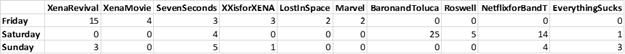

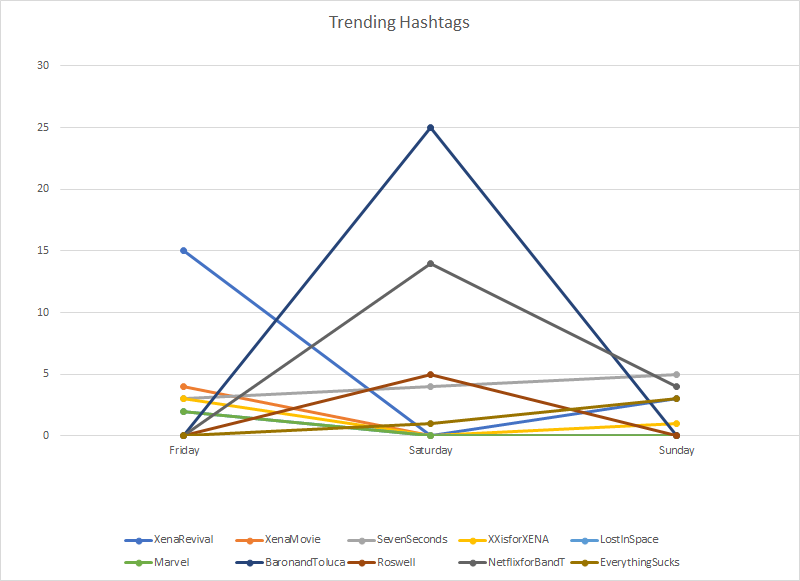

### What are the tags associated with a person, place or thing?

In [44]:

#Find Hashtags

results5 = collection.find({"hashtags":{'$exists': True}}, {"hashtags":1})
for d in results5:
    print(d)


{'_id': ObjectId('5ad4fef478c5134b3c154cad'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cae'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154caf'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cb0'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cb1'), 'hashtags': ['Duh']}
{'_id': ObjectId('5ad4fef478c5134b3c154cb2'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cb3'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cb4'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cb5'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cb6'), 'hashtags': ['LostInSpace']}
{'_id': ObjectId('5ad4fef478c5134b3c154cb7'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cb8'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cb9'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cba'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cbb'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cbc'), 'hasht

###  What social media users are like other social media users in your domain?

Great amount of hashtags are related with upcoming Xena Movie ('XenaRevival', 'XenaMovie', 'Xena' and  'ReneeOConnor'). Therefore, I tried to figure out which users are similar to each other in terms of their common Xena interest. Users which tweeted more than once were considered.

L0B033 and SVURizzoli look similar such that they mostly tweeted about Xena.

In [141]:
results6 = collection.find({'hashtags': "Xena"},{"user_screen_name":1})
for d in results6:
    print(d)

{'_id': ObjectId('5ad4fef478c5134b3c154cdc'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cef'), 'user_screen_name': 'L0B033'}


In [142]:

results6 = collection.find({'hashtags': "XenaRevival"},{"user_screen_name":1})
for d in results6:
    print(d)


{'_id': ObjectId('5ad4fef478c5134b3c154cc7'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cc9'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cca'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cd3'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cd6'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cda'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cdc'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cef'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cf1'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cf9'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cfd'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154d01'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154d05'), 'user_screen_name': 'L0B033'}
{'_id': Obje

In [147]:
results6 = collection.find({'hashtags': "XenaMovie"},{"user_screen_name":1})
for d in results6:
    print(d)


{'_id': ObjectId('5ad4fef478c5134b3c154cd6'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cef'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154cfd'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154d01'), 'user_screen_name': 'L0B033'}


In [185]:
results6 = collection.find({'hashtags': "ReneeOConnor"},{"user_screen_name":1})
for d in results6:
    print(d)


{'_id': ObjectId('5ad4fef478c5134b3c154cfd'), 'user_screen_name': 'L0B033'}
{'_id': ObjectId('5ad4fef478c5134b3c154d14'), 'user_screen_name': 'L0B033'}


### Cases

#### Find user names and locations using 'LostInSpace'  as hashtag in their tweets. 

In [94]:
results6 = collection.find({'hashtags': "LostInSpace"},{"user_location":1,"user_screen_name":1})
for d in results6:
    print(d)

{'_id': ObjectId('5ad4fef478c5134b3c154cb6'), 'user_screen_name': 'NormalPothead', 'user_location': 'My Crib'}
{'_id': ObjectId('5ad4fef478c5134b3c154d1a'), 'user_screen_name': 'RobtheteacherBB', 'user_location': 'The Acreage, FL'}


####   Find hashtags used by users having more than 4000 followers.

In [55]:
results5 = collection.find({"user_followers_count":{'$gte': 4000}},{"hashtags":1})
for d in results5:
    print(d)


{'_id': ObjectId('5ad4fef478c5134b3c154cae'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cb1'), 'hashtags': ['Duh']}
{'_id': ObjectId('5ad4fef478c5134b3c154cb5'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cc0'), 'hashtags': ['SevenSeconds']}
{'_id': ObjectId('5ad4fef478c5134b3c154cd1'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cdf'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154ce4'), 'hashtags': ['TheRitual', 'FilmClub', 'MovieClub']}
{'_id': ObjectId('5ad4fef478c5134b3c154ced'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cf7'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cff'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d04'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d08'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d12'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d1b'), 'hashtags': ['Nevada']}
{'_id': ObjectId('5ad4fef478c5134b3c154d20'), 'hashtags': []}
{'_id':

#### Find hashtags used in tweets which get more than 100 retweets

In [126]:
results5 = collection.find({"retweet_count":{'$gte': 100}},{"hashtags":1})
for d in results5:
    print(d)

{'_id': ObjectId('5ad4fef478c5134b3c154cc8'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154ccb'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154cd2'), 'hashtags': ['TheOutsider']}
{'_id': ObjectId('5ad4fef478c5134b3c154cee'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d00'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d03'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d13'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d15'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d16'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d1a'), 'hashtags': ['LostInSpace']}
{'_id': ObjectId('5ad4fef478c5134b3c154d20'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d21'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d40'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d44'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d47'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154d9f')

#### Find the hashtags used by users located in New York

In [128]:
results6 = collection.find({'user_location': "New York, NY"},{'hashtags':1})
for d in results6:
    print(d)
       

{'_id': ObjectId('5ad4fef478c5134b3c154cc0'), 'hashtags': ['SevenSeconds']}
{'_id': ObjectId('5ad4fef478c5134b3c154e00'), 'hashtags': ['Humanity', 'DeadlySirius']}
{'_id': ObjectId('5ad4fef478c5134b3c154e14'), 'hashtags': ['Sleep']}
{'_id': ObjectId('5ad4fef478c5134b3c154e47'), 'hashtags': []}
{'_id': ObjectId('5ad4fef478c5134b3c154eae'), 'hashtags': []}


####   Find names of the users having get more than 250 retweets

In [129]:
results5 = collection.find({"retweet_count":{'$gte': 250}},{"user_screen_name":1})
for d in results5:
    print(d)

{'_id': ObjectId('5ad4fef478c5134b3c154ccb'), 'user_screen_name': 't0mm00'}
{'_id': ObjectId('5ad4fef478c5134b3c154d00'), 'user_screen_name': 'dobrevcbellos'}
{'_id': ObjectId('5ad4fef478c5134b3c154d13'), 'user_screen_name': 'sanford_meghan'}
{'_id': ObjectId('5ad4fef478c5134b3c154d15'), 'user_screen_name': 'Rockets2Writing'}
{'_id': ObjectId('5ad4fef478c5134b3c154d16'), 'user_screen_name': 'thenameisclarky'}
{'_id': ObjectId('5ad4fef478c5134b3c154d1a'), 'user_screen_name': 'RobtheteacherBB'}
{'_id': ObjectId('5ad4fef478c5134b3c154d20'), 'user_screen_name': 'wakandastark'}
{'_id': ObjectId('5ad4fef478c5134b3c154d21'), 'user_screen_name': 'TheOtherOsama'}
{'_id': ObjectId('5ad4fef478c5134b3c154d40'), 'user_screen_name': '_sean_parker'}
{'_id': ObjectId('5ad4fef478c5134b3c154d44'), 'user_screen_name': 'NicoleAMurray1'}
{'_id': ObjectId('5ad4fef478c5134b3c154d9f'), 'user_screen_name': 'azooz6600'}
{'_id': ObjectId('5ad4fef478c5134b3c154dc2'), 'user_screen_name': 'Quetxalcoatl1'}
{'_id': O